In [5]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread


gray_image = imread('monaLisa.jpg', mode='L')

C:\Users\hazem\AppData\Local\Temp\ipykernel_19176\2733069954.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gray_image = imread('monaLisa.jpg', mode='L')


# Step 1: Standardize the data


In [6]:
mean_image = np.mean(gray_image, axis=0)
centered_data = gray_image - mean_image

print(mean_image.shape)

(350,)


# Step 2: Compute the covariance matrix

In [7]:
cov_matrix = np.cov(centered_data.T)

# Step 3: Compute eigenvectors and eigenvalues


In [8]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and select principal components

In [9]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print(len(eigenvalues))

350


# Choose the number of principal components

In [10]:
num_components = 35  
feature_vector = eigenvectors[:, :num_components]

# Step 5: Project the data onto the principal components

In [11]:
projected_data = np.dot(centered_data, feature_vector)

# Image reconstruction & visualization

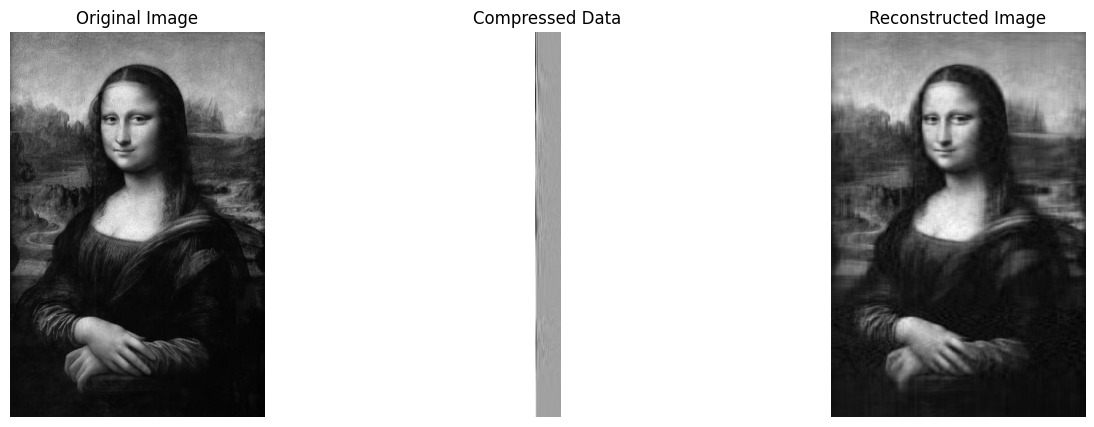

In [12]:
reconstructed_data = np.dot(projected_data, feature_vector.T) + mean_image


plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Compressed Data (projected)
plt.subplot(1, 3, 2)
plt.imshow(projected_data[:, :50], cmap='gray')  
plt.title("Compressed Data")
plt.axis("off")

# Reconstructed Image
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_data, cmap='gray')
plt.title("Reconstructed Image")
plt.axis("off")

plt.show()

# Conclusion: 
- The original number of components was 350 component.
- As we increase the number of components to choose the image quality gets better.
- The optimum number (from my POV by eyes not using Elbow) is 35.
- This means that the PCA helped us compressing the image to only 10% of its size.